In [67]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sort_dataframeby_monthorweek as sd

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [68]:
# reading data
hotel_bookings = pd.read_csv('hotel_bookings.csv')
hotel_bookings.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [69]:
hotel_bookings.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [70]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [71]:
null_values = pd.DataFrame({'Null Values' : hotel_bookings.isna().sum(), 'Percentage Null Values' : round((hotel_bookings.isna().sum()) / (hotel_bookings.shape[0]) * (100), 2)})
null_values

Null Values  Percentage Null Values
hotel                                     0                    0.00
is_canceled                               0                    0.00
lead_time                                 0                    0.00
arrival_date_year                         0                    0.00
arrival_date_month                        0                    0.00
arrival_date_week_number                  0                    0.00
arrival_date_day_of_month                 0                    0.00
stays_in_weekend_nights                   0                    0.00
stays_in_week_nights                      0                    0.00
adults                                    0                    0.00
children                                  4                    0.00
babies                                    0                    0.00
meal                                      0                    0.00
country                                 488                    0.41
market_segment                            0                    0.00
distribution_channel                      0                    0.00
is_repeated_guest                         0                    0.00
previous_cancellations                    0                    0.00
previous_bookings_not_canceled            0                    0.00
reserved_room_type                        0                    0.00
assigned_room_type                        0                    0.00
booking_changes                           0                    0.00
deposit_type                              0                    0.00
agent                                 16340                   13.69
company                              112593                   94.31
days_in_waiting_list                      0                    0.00
customer_type                             0                    0.00
adr                                       0                    0.00
required_car_parking_spaces               0                    0.00
total_of_special_requests                 0                    0.00
reservation_status                        0                    0.00
reservation_status_date                   0                    0.00

In [72]:
cols_to_be_cleaned = hotel_bookings.columns[hotel_bookings.isnull().any()]
cols_to_be_cleaned

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [73]:
numerical_columns_with_missing_values = hotel_bookings.select_dtypes(include=[np.number]).columns[hotel_bookings.select_dtypes(include=[np.number]).isna().any()]
numerical_columns_with_missing_values

Index(['children', 'agent', 'company'], dtype='object')

In [74]:
def clean_data_with_mean_imputation(data, columns_to_impute):
    """
    Clean the data by performing mean imputation for specified columns with missing values.

    Parameters:
    - data: DataFrame, the input dataset.
    - columns_to_impute: list, names of columns to impute using mean.

    Returns:
    - cleaned_data: DataFrame, the cleaned dataset with mean imputation.
    """
    cleaned_data = data.copy()  # Create a copy to avoid modifying the original data

    for column in columns_to_impute:
        if column in cleaned_data.columns:
            mean_value = cleaned_data[column].mean()
            cleaned_data[column].fillna(mean_value, inplace=True)

    return cleaned_data

In [75]:
hotel_bookings = clean_data_with_mean_imputation(hotel_bookings, numerical_columns_with_missing_values)

In [76]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

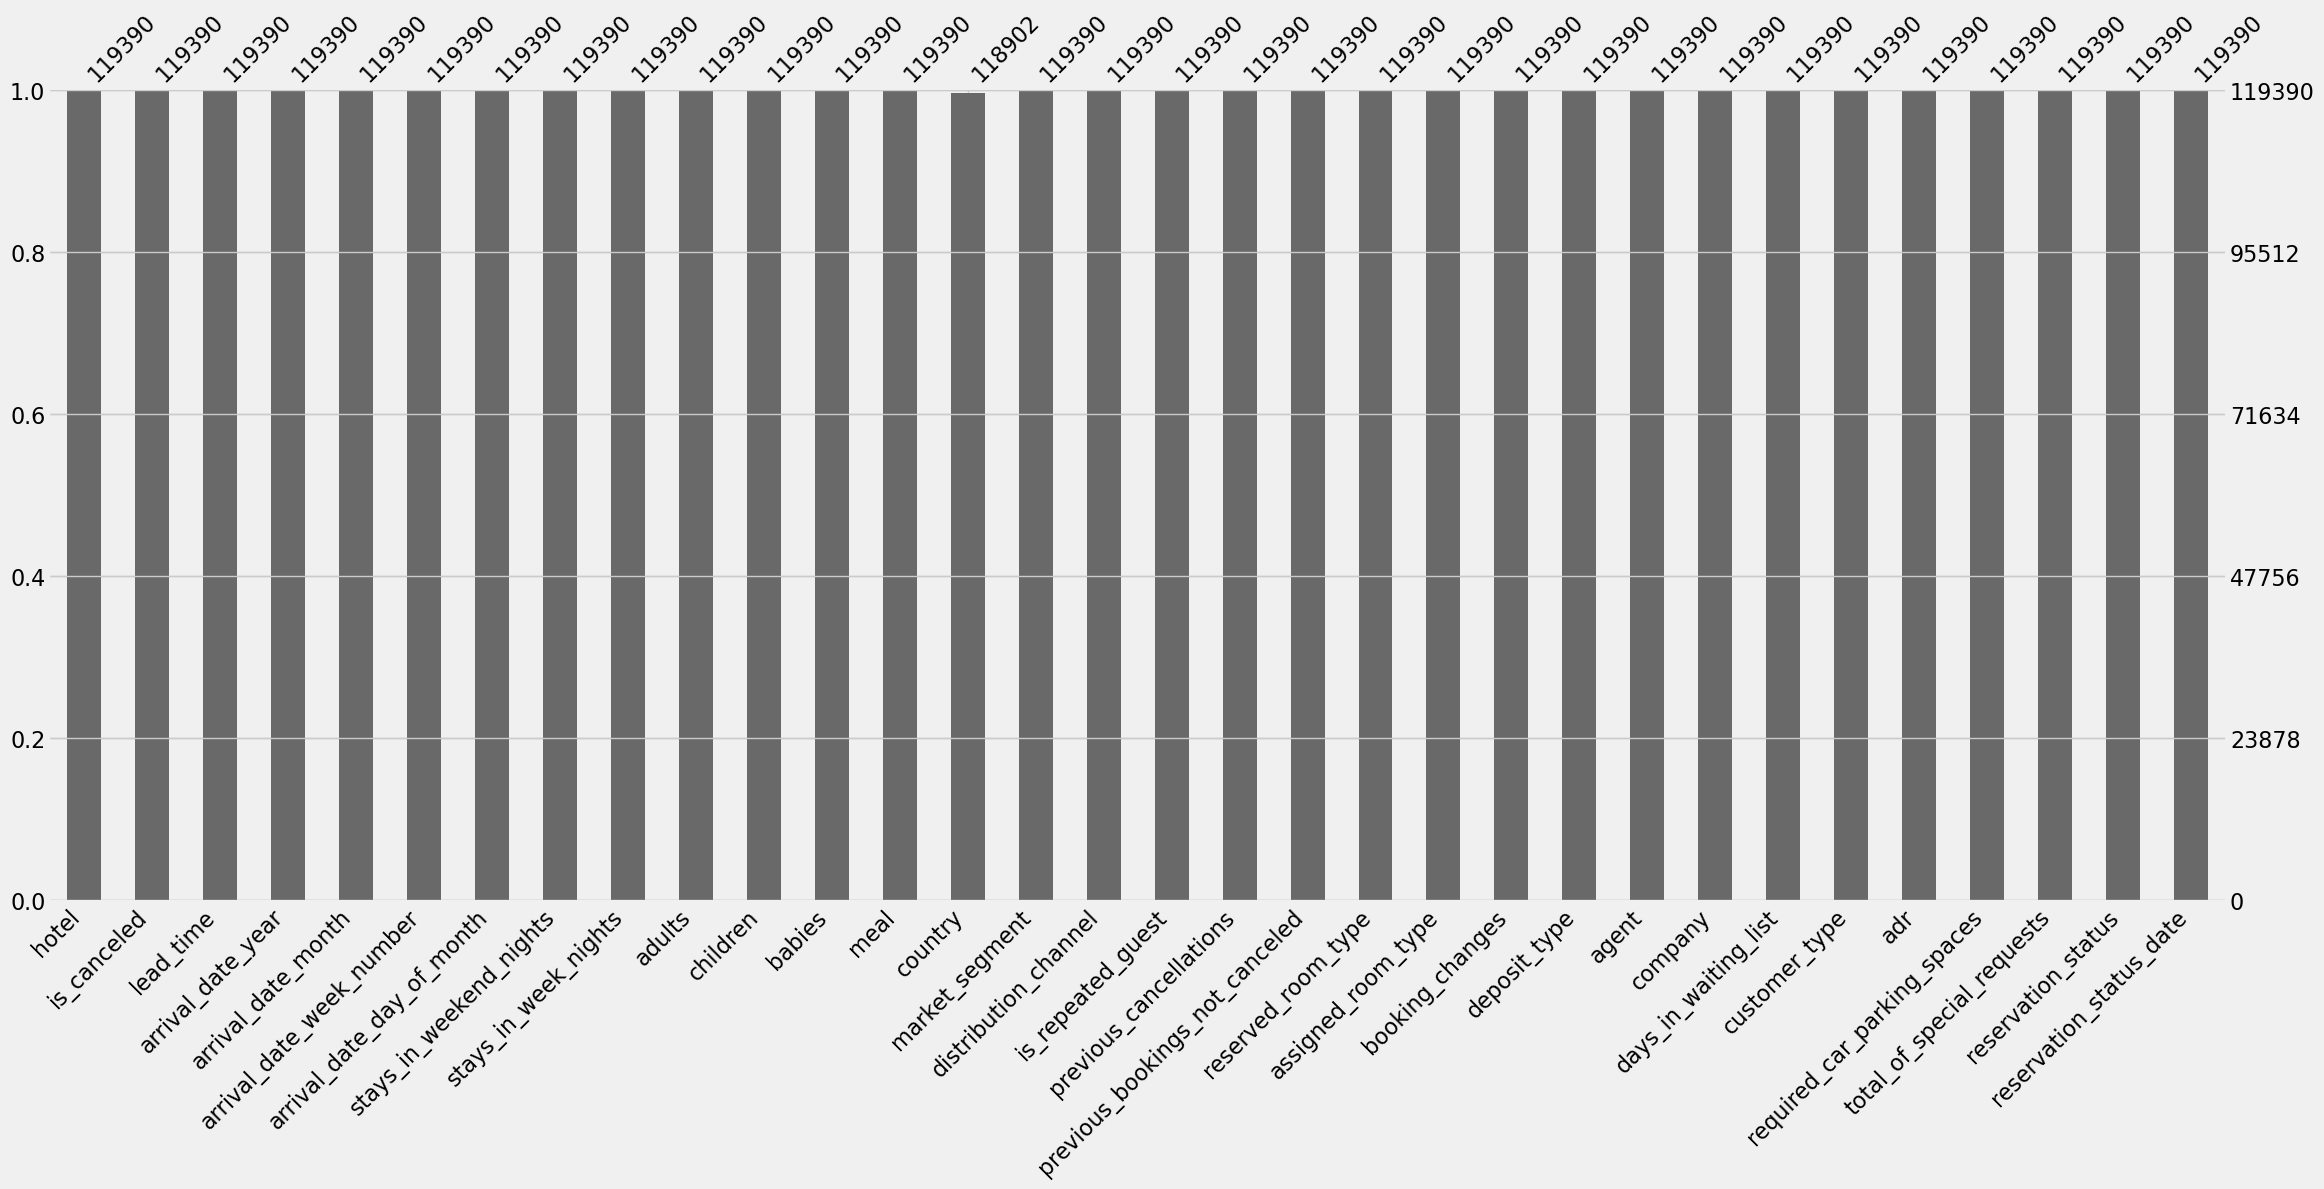

In [77]:
# visualizing null values
msno.bar(hotel_bookings)
plt.show()

In [78]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (hotel_bookings.children == 0) & (hotel_bookings.adults == 0) & (hotel_bookings.babies == 0)
hotel_bookings[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

In [79]:
hotel_bookings = hotel_bookings[~filter]
hotel_bookings

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [80]:
country_wise_guests = hotel_bookings[hotel_bookings['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
160     BHR             1
161     DJI             1
162     MLI             1
163     NPL             1
164     FRO             1

[165 rows x 2 columns]

In [81]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

In [82]:
data = hotel_bookings[hotel_bookings['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'ggplot2')

In [83]:
data_resort = hotel_bookings[(hotel_bookings['hotel'] == 'Resort Hotel') & (hotel_bookings['is_canceled'] == 0)]
data_city = hotel_bookings[(hotel_bookings['hotel'] == 'City Hotel') & (hotel_bookings['is_canceled'] == 0)]

In [84]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [85]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [86]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

month  price_for_resort  price_for_city_hotel
0       April         75.867816            111.962267
1      August        181.205892            118.674598
2    December         68.410104             88.401855
3    February         54.147478             86.520062
4     January         48.761125             82.330983
5        July        150.122528            115.818019
6        June        107.974850            117.874360
7       March         57.056838             90.658533
8         May         76.657558            120.669827
9    November         48.706289             86.946592
10    October         61.775449            102.004672
11  September         96.416860            112.776582

In [122]:
import sort_dataframeby_monthorweek as sd
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final_prices = sort_month(final_hotel, 'month')
final_prices

plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'ggplot2')

<Figure size 1700x800 with 0 Axes>

In [88]:
filter = hotel_bookings['is_canceled'] == 0
data = hotel_bookings[filter]
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type       agent     company  \
0                  C                3   No Deposit   86.693382  189.266735   
1                  C                4   No Deposit   86.693382  189.266735   
2                  C                0   No Deposit   86.693382  189.266735   
3                  A                0   No Deposit  304.000000  189.266735   
4                  A                0   No Deposit  240.000000  189.266735   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [89]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  ...  \
0   BB     PRT         Direct               Direct  ...   
1   BB     PRT         Direct               Direct  ...   
2   BB     GBR         Direct               Direct  ...   
3   BB     GBR      Corporate            Corporate  ...   
4   BB     GBR      Online TA                TA/TO  ...   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   C   
1                       0                               0                   C   
2                       0                               0                   A   
3                       0                               0                   A   
4                       0                               0                   A   

  assigned_room_type booking_changes  deposit_type       agent     company  \
0                  C               3    No Deposit   86.693382  189.266735   
1                  C               4    No Deposit   86.693382  189.266735   
2                  C               0    No Deposit   86.693382  189.266735   
3                  A               0    No Deposit  304.000000  189.266735   
4                  A               0    No Deposit  240.000000  189.266735   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0      Transient   0.0                            0   
1                     0      Transient   0.0                            0   
2                     0      Transient  75.0                            0   
3                     0      Transient  75.0                            0   
4                     0      Transient  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           Check-Out              2015-07-01   
1                          0           Check-Out              2015-07-01   
2                          0           Check-Out              2015-07-02   
3                          0           Check-Out              2015-07-02   
4                          1           Check-Out              2015-07-03   

  total_nights  
0            0  
1            0  
2            1  
3            1  
4            2  

[5 rows x 33 columns]

In [90]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

In [91]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'ggplot2')

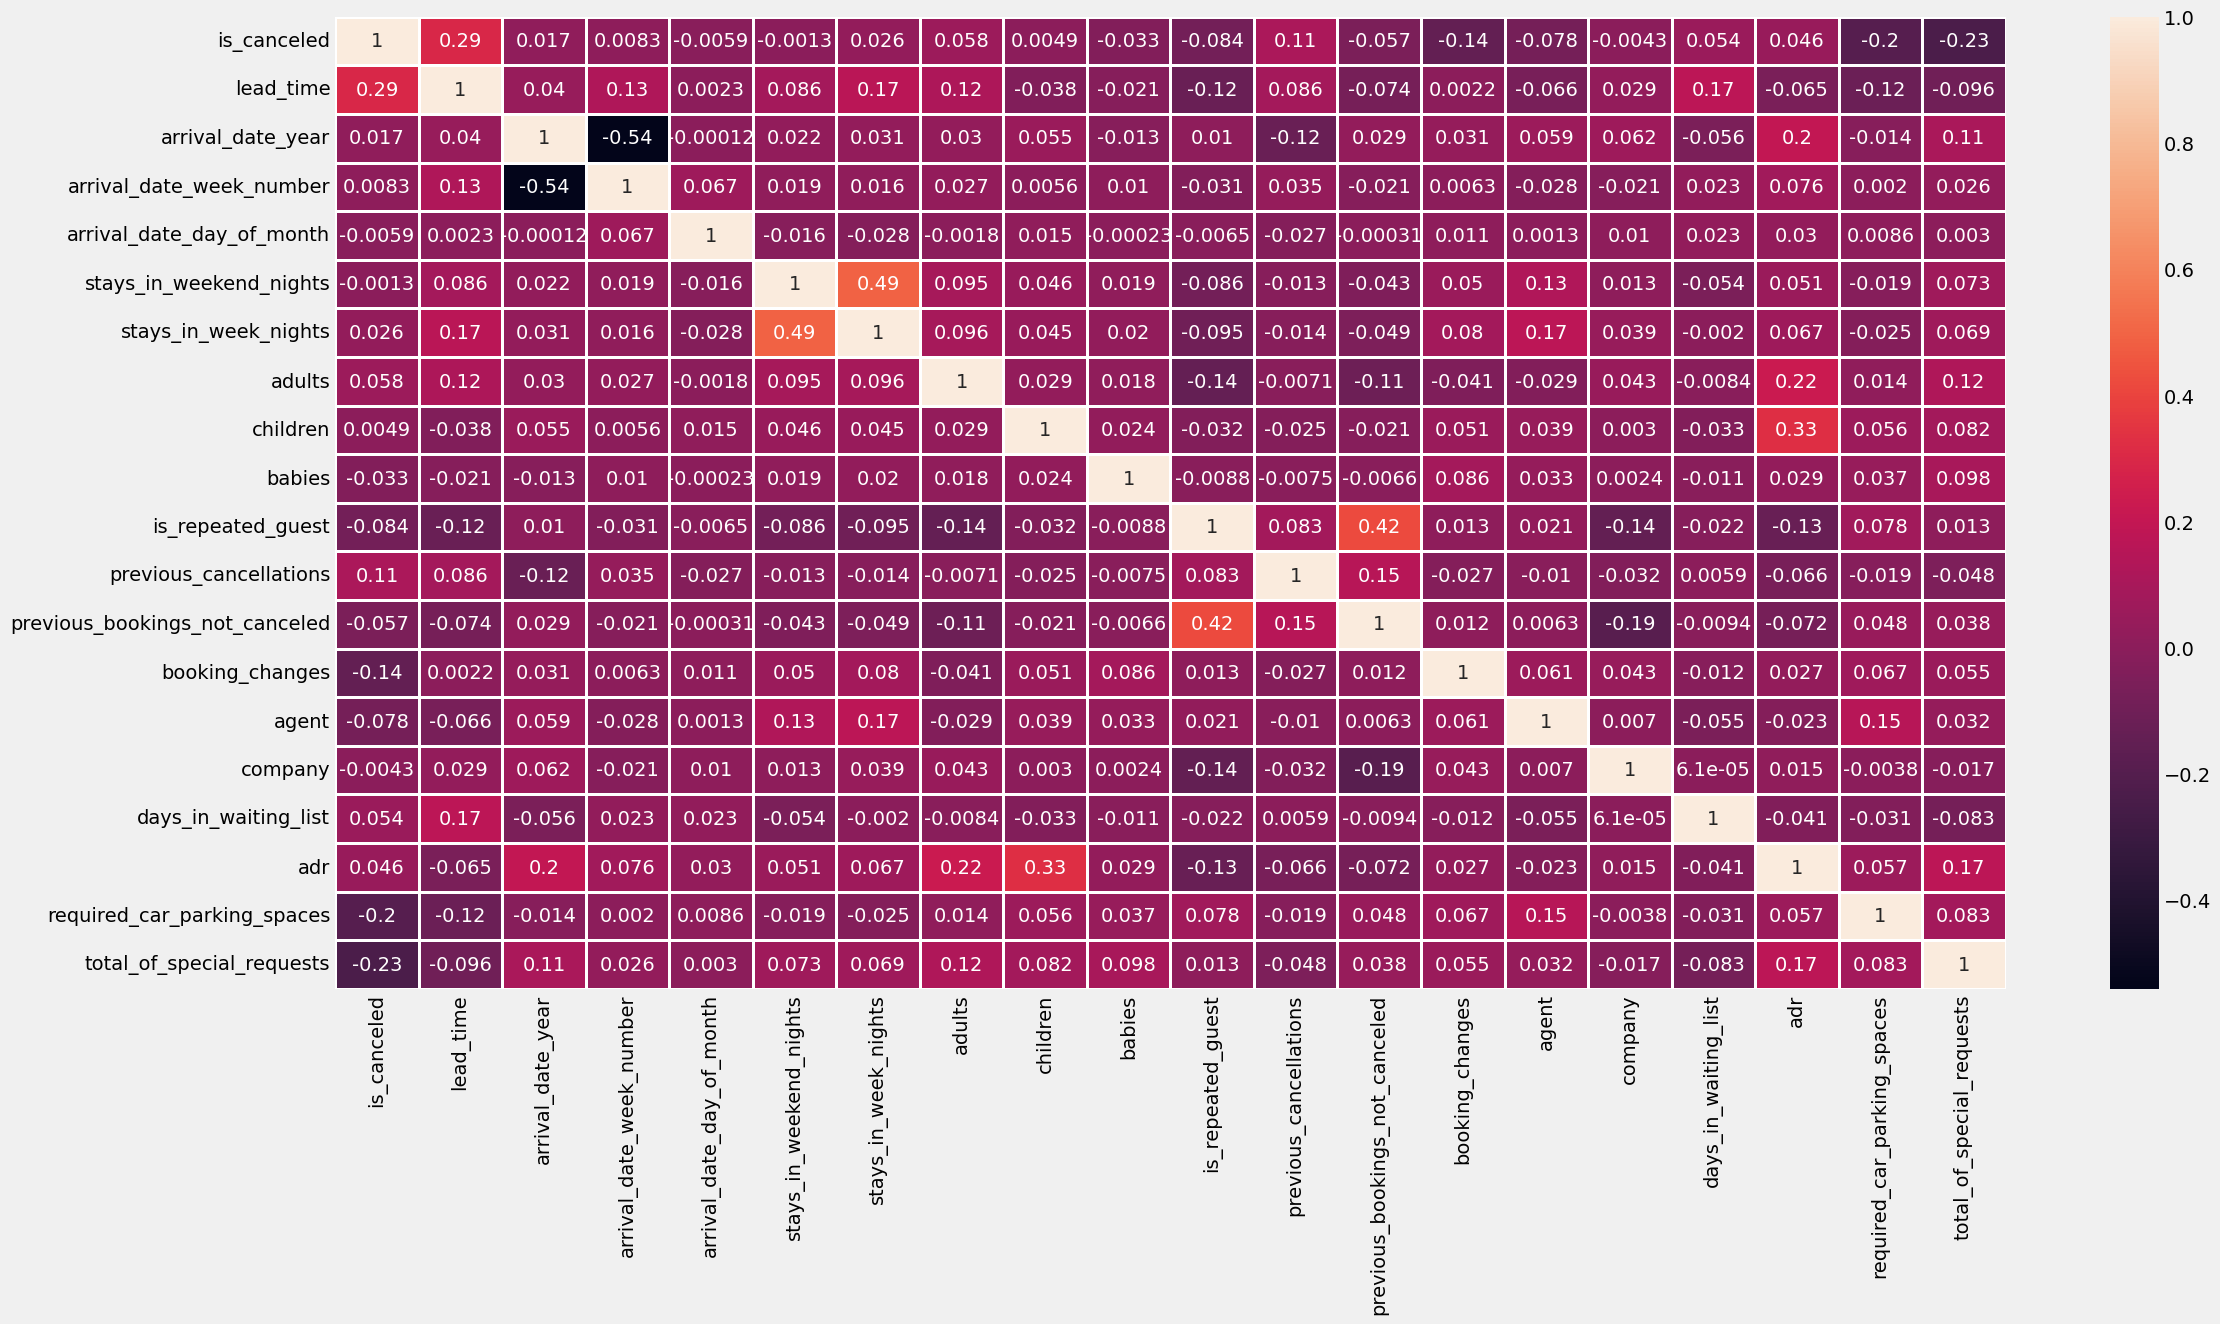

In [92]:
plt.figure(figsize = (24, 12))

corr = hotel_bookings.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [93]:
correlation = hotel_bookings.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
agent                             0.078247
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004862
company                           0.004259
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [94]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

hotel_bookings.drop(useless_col, axis = 1, inplace = True)

In [95]:
hotel_bookings.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0        342               July   
1  Resort Hotel            0        737               July   
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal market_segment distribution_channel  is_repeated_guest  \
0   BB         Direct               Direct                  0   
1   BB         Direct               Direct                  0   
2   BB         Direct               Direct                  0   
3   BB      Corporate            Corporate                  0   
4   BB      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  deposit_type       agent     company customer_type   adr  \
0   No Deposit   86.693382  189.266735     Transient   0.0   
1   No Deposit   86.693382  189.266735     Transient   0.0   
2   No Deposit   86.693382  189.266735     Transient  75.0   
3   No Deposit  304.000000  189.266735     Transient  75.0   
4   No Deposit  240.000000  189.266735     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          1   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03

In [96]:
# creating numerical and categorical dataframes

cat_cols = [col for col in hotel_bookings.columns if hotel_bookings[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [97]:
cat_df = hotel_bookings[cat_cols]
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient              2015-07-01  
1                  C   No Deposit     Transient              2015-07-01  
2                  A   No Deposit     Transient              2015-07-02  
3                  A   No Deposit     Transient              2015-07-02  
4                  A   No Deposit     Transient              2015-07-03

In [98]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [99]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [100]:
cat_df.head()

hotel meal market_segment distribution_channel reserved_room_type  \
0  Resort Hotel   BB         Direct               Direct                  C   
1  Resort Hotel   BB         Direct               Direct                  C   
2  Resort Hotel   BB         Direct               Direct                  A   
3  Resort Hotel   BB      Corporate            Corporate                  A   
4  Resort Hotel   BB      Online TA                TA/TO                  A   

  deposit_type customer_type  year  month  day  
0   No Deposit     Transient  2015      7    1  
1   No Deposit     Transient  2015      7    1  
2   No Deposit     Transient  2015      7    2  
3   No Deposit     Transient  2015      7    2  
4   No Deposit     Transient  2015      7    3

In [101]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [102]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [103]:
cat_df.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0      0     0               0                     0                   0   
1      0     0               0                     0                   0   
2      0     0               0                     0                   1   
3      0     0               1                     1                   1   
4      0     0               2                     2                   1   

   deposit_type  customer_type  year  month  day  
0             0              0     0      7    1  
1             0              0     0      7    1  
2             0              0     0      7    2  
3             0              0     0      7    2  
4             0              0     0      7    3

In [104]:
num_df = hotel_bookings.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled       agent     company     adr  \
0                                    0   86.693382  189.266735    0.00   
1                                    0   86.693382  189.266735    0.00   
2                                    0   86.693382  189.266735   75.00   
3                                    0  304.000000  189.266735   75.00   
4                                    0  240.000000  189.266735   98.00   
...                                ...         ...         ...     ...   
119385                               0  394.000000  189.266735   96.14   
119386                               0    9.000000  189.266735  225.43   
119387                               0    9.000000  189.266735  157.71   
119388                               0   89.000000  189.266735  104.40   
119389                               0    9.000000  189.266735  151.20   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387     

In [105]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159069
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             10598.109785
company                             982.952651
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [106]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [107]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159069
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             2.332723
company                           0.048166
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [108]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [109]:
X = pd.concat([cat_df, num_df], axis = 1)
y = hotel_bookings['is_canceled']

In [110]:
X.shape, y.shape

((119210, 26), (119210,))

In [111]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [112]:
X_train.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
97370       1     0               0                     0                   1   
53454       1     0               2                     2                   5   
16792       0     0               2                     2                   1   
109656      1     2               2                     2                   5   
17957       0     2               3                     2                   1   

        deposit_type  customer_type  year  month  day  lead_time  \
97370              0              0     2      9   16   2.197225   
53454              0              0     2      4   25   4.043051   
16792              0              0     0      9   12   5.662960   
109656             0              0     3      4   15   5.225747   
17957              0              0     0     10   28   0.000000   

        arrival_date_week_number  arrival_date_day_of_month  \
97370                   3.663562                   2.772589   
53454                   3.295837                   3.044522   
16792                   3.610918                   0.693147   
109656                  2.772589                   2.564949   
17957                   3.806662                   3.295837   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
97370                         0                     1       1       0.0   
53454                         1                     3       1       2.0   
16792                         2                     9       1       0.0   
109656                        0                     3       2       2.0   
17957                         1                     1       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
97370        0                  0                       0   
53454        0                  0                       0   
16792        0                  0                       0   
109656       0                  0                       0   
17957        0                  0                       0   

        previous_bookings_not_canceled     agent   company       adr  \
97370                                0  2.708050  5.248427  5.075174   
53454                                0  2.302585  5.248427  5.047995   
16792                                0  5.484797  5.248427  4.820282   
109656                               0  2.302585  5.248427  5.247024   
17957                                0  4.997212  5.248427  4.198705   

        required_car_parking_spaces  total_of_special_requests  
97370                             0                          0  
53454                             0                          0  
16792                             0                          0  
109656                            0                          0  
17957                             0                          0

In [113]:
X_test.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
95060       1     3               2                     2                   1   
84937       1     0               0                     0                   1   
100230      1     2               3                     2                   1   
78534       1     0               2                     2                   1   
30399       0     2               2                     2                   1   

        deposit_type  customer_type  year  month  day  lead_time  \
95060              0              0     2      8   14   1.386294   
84937              0              2     2      3    6   3.663562   
100230             0              2     2     10   25   5.958425   
78534              0              0     0     10   12   3.610918   
30399              0              0     2     11   21   3.637586   

        arrival_date_week_number  arrival_date_day_of_month  \
95060                   3.526361                   2.639057   
84937                   2.397895                   1.386294   
100230                  3.806662                   3.178054   
78534                   3.850148                   2.639057   
30399                   3.828641                   3.465736   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
95060                         0                     1       1       0.0   
84937                         0                     3       2       0.0   
100230                        2                     0       2       0.0   
78534                         1                     2       2       0.0   
30399                         6                    15       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
95060        0                  0                       0   
84937        0                  0                       0   
100230       0                  0                       0   
78534        0                  0                       1   
30399        0                  0                       0   

        previous_bookings_not_canceled     agent   company       adr  \
95060                                0  2.302585  5.248427  5.129899   
84937                                0  4.473846  5.248427  4.485373   
100230                               0  1.945910  5.248427  4.753590   
78534                                0  2.302585  5.248427  4.666265   
30399                                0  5.752573  5.248427  4.092843   

        required_car_parking_spaces  total_of_special_requests  
95060                             0                          2  
84937                             0                          1  
100230                            0                          1  
78534                             0                          1  
30399                             0                          0

In [114]:
y_train.head(), y_test.head()

(97370     0
 53454     1
 16792     0
 109656    0
 17957     0
 Name: is_canceled, dtype: int64,
 95060     0
 84937     0
 100230    0
 78534     1
 30399     0
 Name: is_canceled, dtype: int64)

In [115]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8088527248832592
Confusion Matrix : 
[[21207  1270]
 [ 5566  7720]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     22477
           1       0.86      0.58      0.69     13286

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763



In [116]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9536112742219612
Confusion Matrix : 
[[22306   171]
 [ 1488 11798]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22477
           1       0.99      0.89      0.93     13286

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763



In [117]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9824958756256467
Confusion Matrix : 
[[22464    13]
 [  613 12673]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22477
           1       1.00      0.95      0.98     13286

    accuracy                           0.98     35763
   macro avg       0.99      0.98      0.98     35763
weighted avg       0.98      0.98      0.98     35763



In [118]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest Classifier', 'XgBoost'],
    'Score' : [acc_lr, acc_rd_clf, acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2                   XgBoost  0.982496
1  Random Forest Classifier  0.953611
0       Logistic Regression  0.808853

In [119]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'ggplot2', title = 'Models Comparison')